In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_zip = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=True)
path = os.path.join(os.path.dirname(path_zip), "cats_and_dogs_filtered")

68608000/68606236 [==============================] - 1s 0us/step


In [3]:
#train and validation data
train_dir = os.path.join(path, "train")
validation_dir = os.path.join(path, "validation")

#joining cats and dogs data from train and validation folders
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

In [4]:
len(os.listdir(validation_cats_dir))

500

In [5]:
train_dir[1]

'r'

In [6]:
batch_size = 20
epochs = 10
img_height = 150
img_width = 150


In [7]:
#Process:

'''

1. Read images
2. Decode > R, G, B
3. Convert tensor objects
4. Rescale 0-255
Image > Width, Height, Channel=3

'''

train_image_generator = ImageDataGenerator(1./255)
validation_image_generator = ImageDataGenerator(1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory = train_dir,
                                                           shuffle = True, target_size =(img_height, img_width), class_mode = 'binary')

validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory = validation_dir,
                                                                     shuffle = True, target_size = (img_height, img_width), class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
len(train_dir)

50

In [9]:
model = Sequential()
model.add(layers.Conv2D(32,(3, 3), activation="relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
#it contains train_data_gen array values with encoded output
sample_train, _ = next(train_data_gen)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [12]:
#sample_train,_

In [13]:
model.compile(loss="binary_crossentropy",optimizer = "adam",  metrics=['acc'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


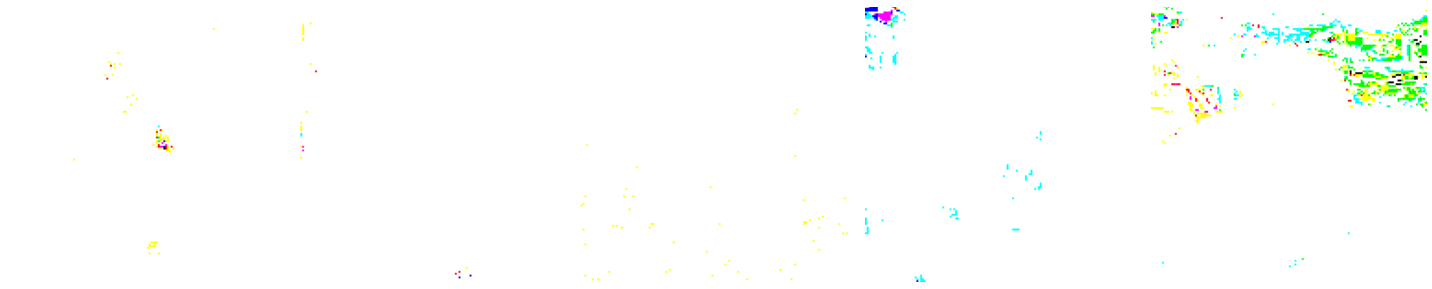

In [14]:
def plotimage(image_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

plotimage(sample_train[:5])

In [15]:
type(train_data_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [16]:

history = model.fit_generator(train_data_gen, steps_per_epoch=100, epochs=30, validation_data=validation_data_gen, validation_steps=50)
model.save('cats_and_dogs.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
100/100 [==============================] - 15s 81ms/step - loss: 13.0504 - acc: 0.5195 - val_loss: 0.6729 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6647 - acc: 0.6068 - val_loss: 0.6847 - val_acc: 0.5670
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6536 - acc: 0.6268 - val_loss: 0.6649 - val_acc: 0.6080
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6607 - acc: 0.6242 - val_loss: 0.6666 - val_acc: 0.5990
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6074 - acc: 0.6620 - val_loss: 0.6582 - val_acc: 0.6290
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5331 - acc: 0.7195 - val_loss: 0.7026 - val_acc: 0.6400
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5087 - acc: 0.7351 - val_loss: 0.6797 - val_acc: 0.6350
Epoch 8/30
100/100 [==============================] - 8s 77ms/step 

In [17]:
summary=history.history

In [18]:
summary.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

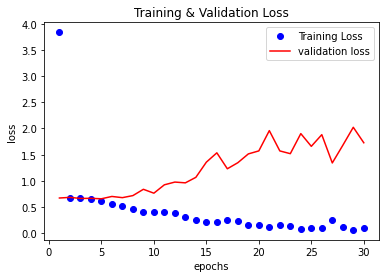

In [19]:
loss = summary['loss']
val_loss = summary['val_loss']
epochs = range(1, 31)
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="validation loss")
plt.title("Training & Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

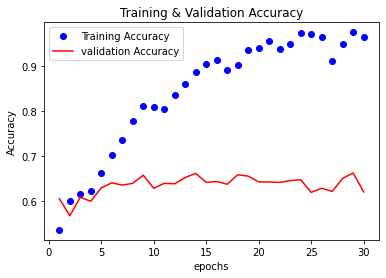

In [20]:
accuracy = summary['acc']
val_accuracy = summary['val_acc']
epochs = range(1, 31)
plt.plot(epochs, accuracy, 'bo', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model.evaluate(validation_data_gen)

 1/50 [..............................] - ETA: 3s - loss: 0.7627 - acc: 0.8500

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


50/50 [==============================] - 3s 51ms/step - loss: 1.7272 - acc: 0.6200


[1.7272073030471802, 0.6200000047683716]

**Model1**

In [22]:
#appling image generators
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, shear_range=0.2, horizontal_flip=True)

In [23]:
train_data_gen1 = datagen.flow_from_directory(batch_size=batch_size, directory = train_dir,
                                                           shuffle = True, target_size =(img_height, img_width), class_mode = 'binary')

validation_data_gen1 = validation_image_generator.flow_from_directory(batch_size=batch_size, directory = validation_dir,
                                                                     shuffle = True, target_size = (img_height, img_width), class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
model1 = Sequential()
model1.add(layers.Conv2D(32,(3, 3), activation="relu", input_shape = (150, 150, 3)))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Conv2D(64, (3, 3), activation="relu"))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Conv2D(128, (3,3), activation="relu"))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Conv2D(128, (3, 3), activation="relu"))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Flatten())
model1.add(layers.Dropout(.5))
model1.add(layers.Dense(512, activation="relu"))
model1.add(layers.Dense(1, activation="sigmoid"))

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [26]:
model1.compile(loss="binary_crossentropy",optimizer = "adam",  metrics=['acc'])

In [27]:

history1 = model1.fit_generator(train_data_gen1, steps_per_epoch=100, epochs=30, validation_data=validation_data_gen, validation_steps=50)
model.save('cats_and_dogs.h5')

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - ETA: 0s - loss: 9.9672 - acc: 0.5090 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 16s 159ms/step - loss: 9.8987 - acc: 0.5088 - val_loss: 0.7066 - val_acc: 0.5060
Epoch 2/30
100/100 [==============================] - 16s 159ms/step - loss: 0.6943 - acc: 0.5196 - val_loss: 0.6915 - val_acc: 0.5130
Epoch 3/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6888 - acc: 0.5193 - val_loss: 0.6854 - val_acc: 0.5470
Epoch 4/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6928 - acc: 0.5133 - val_loss: 0.6909 - val_acc: 0.5240
Epoch 5/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6941 - acc: 0.5154 - val_loss: 0.6876 - val_acc: 0.5540
Epoch 6/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6886 - acc: 0.5500 - val_loss: 0.6893 - val_acc: 0.5280
Epoch 7/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6883 - acc: 0.5456 - val_loss: 0.6904 - val_acc: 0.5170
Epoch 8/30
100/100 [==============================] - 16s 157ms/st

In [28]:
summary1=history1.history

In [29]:
summary1.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

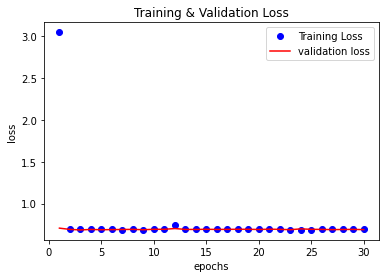

In [30]:
loss = summary1['loss']
val_loss = summary1['val_loss']
epochs = range(1, 31)
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="validation loss")
plt.title("Training & Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [31]:
model1.evaluate(validation_data_gen1)

 2/50 [>.............................] - ETA: 2s - loss: 0.6800 - acc: 0.6000

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


50/50 [==============================] - 3s 51ms/step - loss: 0.6891 - acc: 0.5290


[0.6890601515769958, 0.5289999842643738]